#To Do List

1. Linear/Logistic Regression (Done)
  - Evaluation(DONE)
2. support vector machines (Done)
   - Evaluation(DONE)
3. decision trees (Done) 
  - Evaluation(DONE)
4. multi-layer perceptron neural network.(DONE)
  - Evaluation(DONE)


In [101]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import tensorflow as tf
import math
import logging

# Load Data

In [102]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [103]:
df = pd.read_csv('drive/MyDrive/Datasets/adult.data',index_col = False)

In [104]:
df.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [105]:
df.columns = ['Age', 'Workclass', 'fnlwgt', 'Education', 'Education_Num', 'Marital_Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Capital_Gain', 'Capital_Loss', 'Hours_Per_Week', 'Native_Country', 'Income']

# Data pre-processing

In [106]:
df.head()

,Age,Workclass,fnlwgt,Education,Education_Num,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


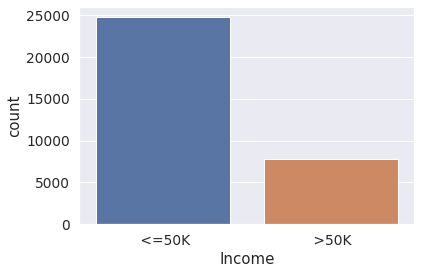

In [107]:
sns.countplot(x="Income", data=df)


In [108]:
df.shape

(32560, 15)

In [109]:
df.dtypes

Age                int64
Workclass         object
fnlwgt             int64
Education         object
Education_Num      int64
Marital_Status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_Gain       int64
Capital_Loss       int64
Hours_Per_Week     int64
Native_Country    object
Income            object
dtype: object

In [110]:
df.isnull().sum()

Age               0
Workclass         0
fnlwgt            0
Education         0
Education_Num     0
Marital_Status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_Gain      0
Capital_Loss      0
Hours_Per_Week    0
Native_Country    0
Income            0
dtype: int64

In [111]:
df.nunique()

Age                  73
Workclass             9
fnlwgt            21647
Education            16
Education_Num        16
Marital_Status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_Gain        119
Capital_Loss         92
Hours_Per_Week       94
Native_Country       42
Income                2
dtype: int64

In [112]:
df.describe()

,Age,fnlwgt,Education_Num,Capital_Gain,Capital_Loss,Hours_Per_Week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [113]:
df.columns

Index(['Age', 'Workclass', 'fnlwgt', 'Education', 'Education_Num',
       'Marital_Status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_Gain', 'Capital_Loss', 'Hours_Per_Week', 'Native_Country',
       'Income'],
      dtype='object')

## Removing Weird and Redundant Data




In [114]:
df['Workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

In [115]:
df['Occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

In [116]:
df['Native_Country'].value_counts()

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


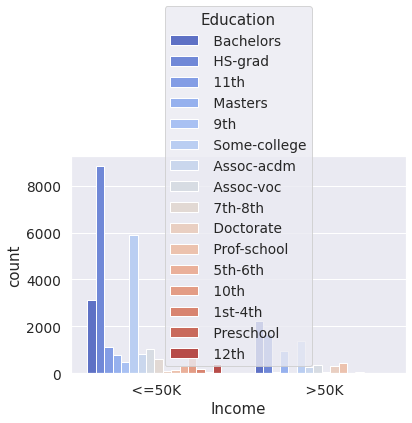

In [117]:
sns.countplot(df['Income'], palette='coolwarm', hue='Education', data=df)

## replace ? with the most common data found in each column


In [118]:
df['Occupation'] = df['Occupation'].replace(' ?', ' Prof-specialty')

In [119]:
df['Workclass'] = df['Workclass'].replace(' ?', ' Private')

In [120]:
df['Native_Country'] = df['Native_Country'].replace(' ?', ' United-States')

In [121]:
df['Native_Country'].value_counts()

 United-States                 29752
 Mexico                          643
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 France                           29
 

## Regrouping/Simplifying Data

#### Education

In [122]:
df['Education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

In [123]:
df['Education'] = df['Education'].replace([' Preschool', ' 1st-4th', ' 5th-6th', ' 7th-8th', ' 9th',' 10th', ' 11th', ' 12th'], ' Highschool and below')

In [124]:
df['Education'] = df['Education'].replace('Highschool and below', ' Highschool and below')

In [125]:
df['Education'] = df['Education'].replace([' Some-college', ' HS-grad'], ' HS-grads')

In [126]:
df['Education'] = df['Education'].replace([' Assoc-voc', ' Assoc-acdm'], ' Assoc')

Marital_Status

In [127]:
df['Marital_Status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_Status, dtype: int64

In [128]:
df['Marital_Status'] = df['Marital_Status'].replace([' Divorced',' Separated',' Widowed', ' Married-spouse-absent', ' Never-married'], ' Not Married')

In [129]:
df['Marital_Status'] = df['Marital_Status'].replace([' Married-civ-spouse', ' Married-AF-spouse'], ' Married')

#### Income

In [130]:
df['Income'] = df['Income'].replace(' <=50K', 0)
df['Income'] = df['Income'].replace(' >50K', 1)

In [131]:
df.head()

,Age,Workclass,fnlwgt,Education,Education_Num,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
1,38,Private,215646,HS-grads,9,Not Married,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
2,53,Private,234721,Highschool and below,7,Married,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
3,28,Private,338409,Bachelors,13,Married,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
4,37,Private,284582,Masters,14,Married,Exec-managerial,Wife,White,Female,0,0,40,United-States,0


#### Workclass

In [132]:
df['Workclass'] = df['Workclass'].replace([' Local-gov', ' State-gov', ' Federal-gov'], ' Gov')

In [133]:
df['Workclass'] = df['Workclass'].replace([' Self-emp-not-inc', ' Self-emp-inc'], ' Self-emp')

In [134]:
df['Workclass'] = df['Workclass'].replace([' Without-pay', ' Never-worked'], ' No work')

# Visualisation

In [136]:
df.corr()

,Age,fnlwgt,Education_Num,Capital_Gain,Capital_Loss,Hours_Per_Week,Income
Age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756,0.234039
fnlwgt,-0.076646,1.000000,-0.043159,0.000437,-0.010259,-0.018770,-0.009481
Education_Num,0.036527,-0.043159,1.000000,0.122627,0.079932,0.148127,0.335182
Capital_Gain,0.077674,0.000437,0.122627,1.000000,-0.031614,0.078409,0.223333
Capital_Loss,0.057775,-0.010259,0.079932,-0.031614,1.000000,0.054256,0.150523
Hours_Per_Week,0.068756,-0.018770,0.148127,0.078409,0.054256,1.000000,0.229690
Income,0.234039,-0.009481,0.335182,0.223333,0.150523,0.229690,1.000000


### Histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb7c04b0090>,
      dtype=object)

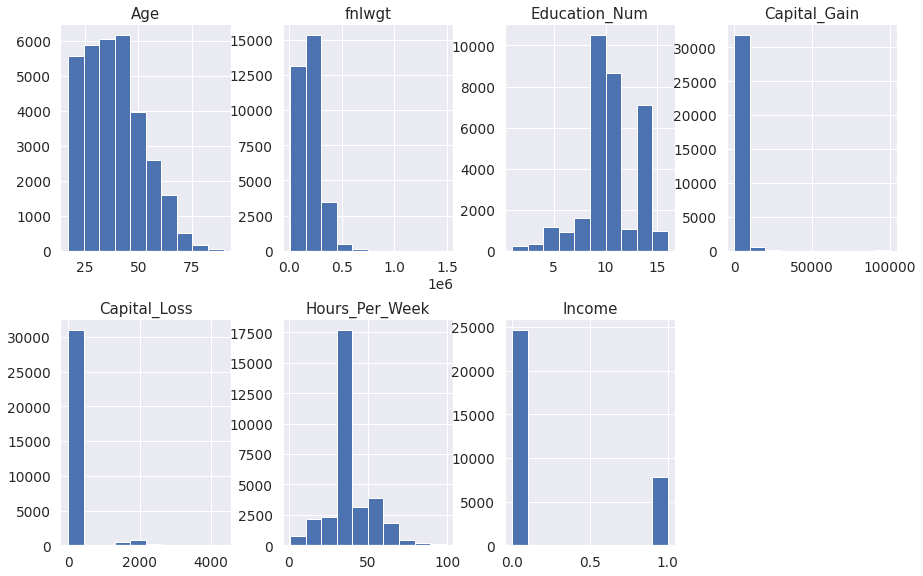

In [137]:
df.hist(figsize=(15,15), layout=(3,4))

### Box Plot

Age                  AxesSubplot(0.125,0.657941;0.227941x0.222059)
fnlwgt            AxesSubplot(0.398529,0.657941;0.227941x0.222059)
Education_Num     AxesSubplot(0.672059,0.657941;0.227941x0.222059)
Capital_Gain         AxesSubplot(0.125,0.391471;0.227941x0.222059)
Capital_Loss      AxesSubplot(0.398529,0.391471;0.227941x0.222059)
Hours_Per_Week    AxesSubplot(0.672059,0.391471;0.227941x0.222059)
Income                  AxesSubplot(0.125,0.125;0.227941x0.222059)
dtype: object

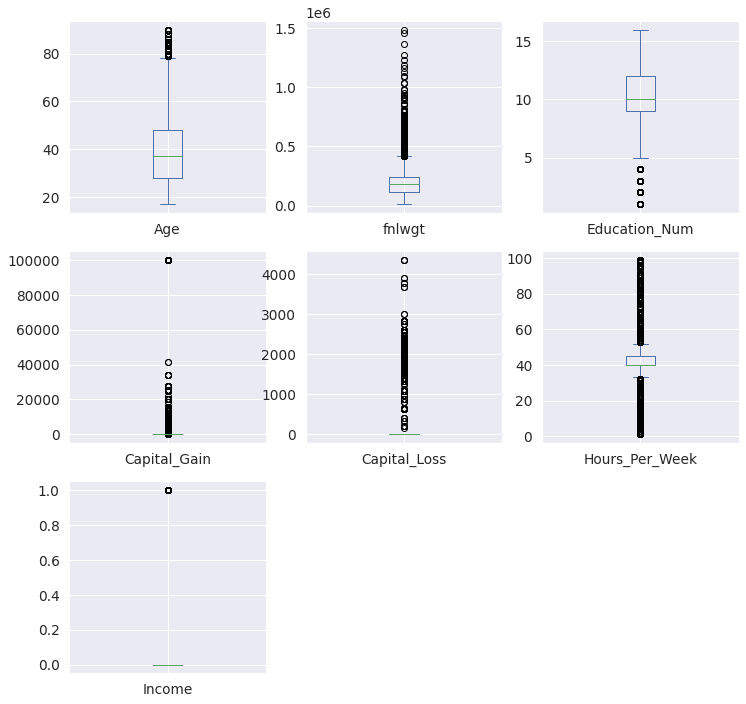

In [138]:
df.plot(kind = 'box', figsize = (12,12), layout=(3,3), sharex = False, subplots=True)

In [139]:
X = df.drop(['Income'], axis=1)
Y = df['Income']

##Normalisation/ Feature Scaler

In [140]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [141]:
dff = df.copy()
dff = dff.apply(LabelEncoder().fit_transform)
dff.head()

,Age,Workclass,fnlwgt,Education,Education_Num,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,Income
0,33,3,2925,1,12,0,3,0,4,1,0,0,12,38,0
1,21,2,14085,3,8,1,5,1,4,1,0,0,39,38,0
2,36,2,15335,4,6,0,5,0,2,1,0,0,39,38,0
3,11,2,19354,1,12,0,9,5,2,0,0,0,39,4,0
4,20,2,17699,5,13,0,3,5,4,0,0,0,39,38,0


In [142]:
Xs = StandardScaler().fit(dff.drop('Income', axis = 1))


In [143]:
X = Xs.transform(dff.drop('Income',axis=1))
y = dff['Income']

In [144]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.15, random_state=0)

# Logistic Regression

In [145]:
from sklearn.linear_model import LogisticRegression
from numpy import mean

In [146]:
lr = LogisticRegression()



model = lr.fit(X_train, y_train)
prediction = model.predict(X_test)

print("Accuracy on Training Data = {:,.3f}".format(lr.score(X_train, y_train)))
print("Accuracy on Test Data = {:,.3f}".format(lr.score(X_test, y_test)))

Accuracy on Training Data = 0.838
Accuracy on Test Data = 0.844


#Support Vector Machine

In [147]:
X = dff[['Education', 'Occupation']]

Y = dff['Income']

X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [148]:
from sklearn.svm import SVC

classifier = SVC()

classifier.fit(X_train, Y_train)

score = classifier.score(x_test, y_test)

print(score)

0.7684275184275184


In [149]:
dff.head()

,Age,Workclass,fnlwgt,Education,Education_Num,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,Income
0,33,3,2925,1,12,0,3,0,4,1,0,0,12,38,0
1,21,2,14085,3,8,1,5,1,4,1,0,0,39,38,0
2,36,2,15335,4,6,0,5,0,2,1,0,0,39,38,0
3,11,2,19354,1,12,0,9,5,2,0,0,0,39,4,0
4,20,2,17699,5,13,0,3,5,4,0,0,0,39,38,0


###Correlation


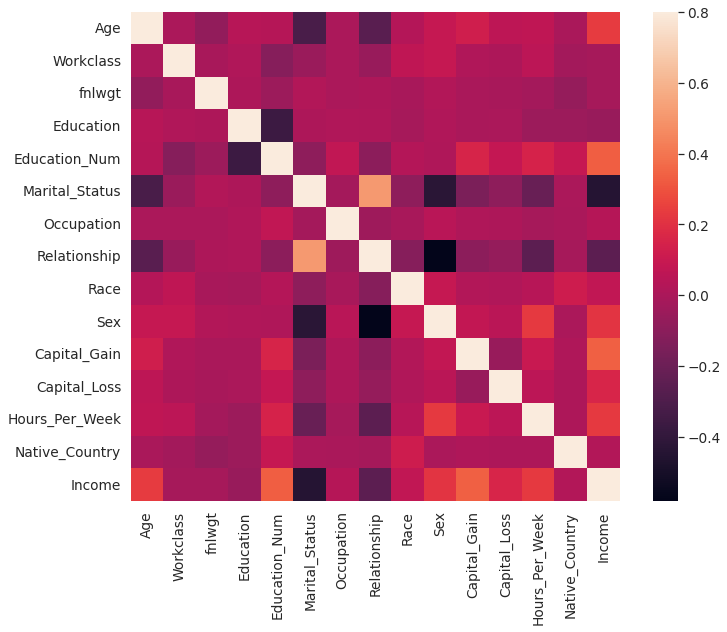

In [150]:
import seaborn as sns
import matplotlib.pyplot as pplt
#correlation matrix
corrmat = dff.corr()
f, ax = pplt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

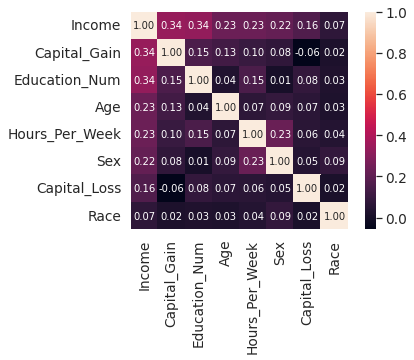

In [151]:
k = 8
cols = corrmat.nlargest(k, 'Income')['Income'].index
cm = np.corrcoef(dff[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
pplt.show()

In [152]:
X = dff[['Education', 'Occupation', 'Capital_Gain', 'Education_Num', 'Age', 'Hours_Per_Week', 'Sex']]

Y = dff['Income']

X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [153]:
from sklearn.svm import SVC

classifier = SVC()

classifier.fit(X_train, Y_train)

scoreTrain = classifier.score(X_train, Y_train)
scoreTest = classifier.score(x_test, y_test)



print("Accuracy of SVM on training data"+ str(scoreTrain))
print("Accuracy of SVM on testing data: "+ str(scoreTest))

Accuracy of SVM on training data0.8176443488943489
Accuracy of SVM on testing data: 0.8158783783783784


#Decision Tree


In [154]:
X = dff[['Education', 'Occupation', 'Capital_Gain', 'Education_Num', 'Age', 'Hours_Per_Week', 'Sex']]

Y = dff['Income']

X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [155]:
from sklearn import tree
import graphviz
from sklearn.model_selection import cross_val_score

In [156]:
t = tree.DecisionTreeClassifier(criterion='entropy', max_depth=7)
t = t.fit(X_train, Y_train)

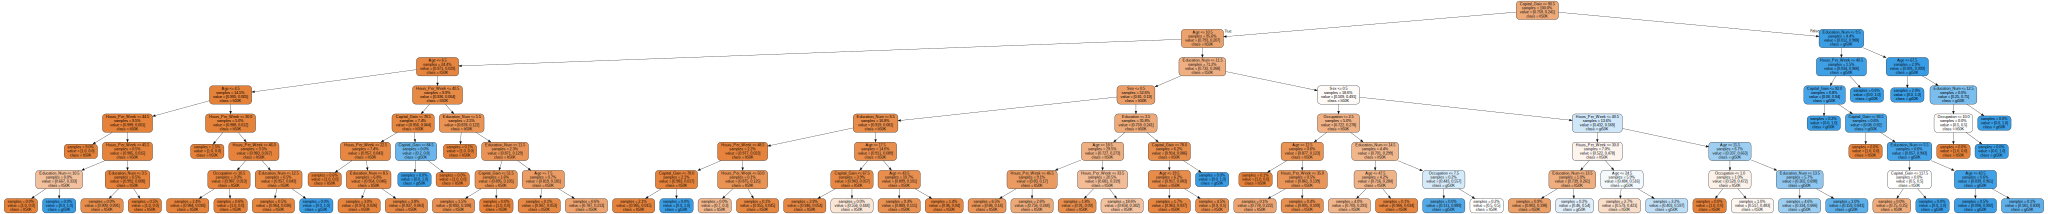

In [157]:
dot_data = tree.export_graphviz(t, out_file=None, label='all', impurity=False, proportion=True, 
                               feature_names=list(X_train), class_names=['lt50K', 'gt50K'],
                               filled=True, rounded=True)
graph = graphviz.Source(dot_data)
graph

In [158]:
scoreTrain = t.score(X_train, Y_train)
scoreTest = t.score(x_test, y_test)

print("Accuracy of decision tree on training data: "+str(scoreTrain))
print("Accuracy of decision tree on testing data: "+str(scoreTest))


Accuracy of decision tree on training data: 0.8311578624078624
Accuracy of decision tree on testing data: 0.8338452088452089


# Peceptron Neural Network

In [159]:
pip install scikeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [160]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from scikeras.wrappers import KerasClassifier

In [161]:
def create_network():
    model = Sequential()
    model.add(Dense(28, input_dim=7, activation='relu', kernel_initializer="uniform"))
    model.add(Dropout(0.2))
    model.add(Dense(20, activation='relu', kernel_initializer="uniform"))
    model.add(Dropout(0.2))
    model.add(Dense(14, activation='relu', kernel_initializer="uniform"))
    model.add(Dropout(0.2))
    model.add(Dense(14, activation='relu', kernel_initializer="uniform"))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [177]:
X = dff[['Education', 'Occupation', 'Capital_Gain', 'Education_Num', 'Age', 'Hours_Per_Week', 'Sex']]
Y = dff['Income']
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.20, random_state=0, stratify = y)

In [178]:
create_network().fit(X_train, y_train, epochs = 10, batch_size= 100)

Epoch 1/10
261/261 [==============================] - 2s 3ms/step - loss: 0.5437 - accuracy: 0.7882
Epoch 2/10
261/261 [==============================] - 1s 3ms/step - loss: 0.4580 - accuracy: 0.7963
Epoch 3/10
261/261 [==============================] - 1s 3ms/step - loss: 0.4365 - accuracy: 0.7976
Epoch 4/10
261/261 [==============================] - 1s 5ms/step - loss: 0.4270 - accuracy: 0.7993
Epoch 5/10
261/261 [==============================] - 1s 5ms/step - loss: 0.4207 - accuracy: 0.8049
Epoch 6/10
261/261 [==============================] - 1s 5ms/step - loss: 0.4162 - accuracy: 0.8072
Epoch 7/10
261/261 [==============================] - 1s 4ms/step - loss: 0.4129 - accuracy: 0.8071
Epoch 8/10
261/261 [==============================] - 1s 3ms/step - loss: 0.4071 - accuracy: 0.8119
Epoch 9/10
261/261 [==============================] - 1s 3ms/step - loss: 0.4046 - accuracy: 0.8123
Epoch 10/10
261/261 [==============================] - 1s 3ms/step - loss: 0.4039 - accuracy: 0.8114

In [162]:
network = KerasClassifier(build_fn=create_network, 
                                 epochs=10, 
                                 batch_size=100, 
                                 verbose=0)

# K-Fold Evaluation

In [189]:
X = dff[['Education', 'Occupation', 'Capital_Gain', 'Education_Num', 'Age', 'Hours_Per_Week', 'Sex']]
X = Xs.transform(dff.drop('Income',axis=1))
y = dff['Income']
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.15, random_state=0)

In [190]:
LogisticRegression_score = cross_val_score(LogisticRegression() , X, Y, cv=5)
LogisticRegression_score_mean = cross_val_score(LogisticRegression() , X, Y, cv=5).mean()

In [191]:
X = dff[['Education', 'Occupation', 'Capital_Gain', 'Education_Num', 'Age', 'Hours_Per_Week', 'Sex']]
Y = dff['Income']
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.20, random_state=0, stratify = y)

In [192]:
SVM_score = cross_val_score(SVC(), X, Y, cv=5)
SVM_score_mean = SVM_score.mean()

In [193]:
X = dff[['Education', 'Occupation', 'Capital_Gain', 'Education_Num', 'Age', 'Hours_Per_Week', 'Sex']]
Y = dff['Income']
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.20, random_state=0, stratify = y)

In [194]:
decisionTree_score = cross_val_score(tree.DecisionTreeClassifier(criterion='entropy', max_depth=7), X, Y, cv=5)
decisionTree_score_mean = cross_val_score(tree.DecisionTreeClassifier(criterion='entropy', max_depth=7), X, Y, cv=5).mean()

In [195]:
X = dff[['Education', 'Occupation', 'Capital_Gain', 'Education_Num', 'Age', 'Hours_Per_Week', 'Sex']]
Y = dff['Income']
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.20, random_state=0, stratify = y)

In [196]:
network_score = cross_val_score(network, X, Y, cv=5)
network_score_mean = network_score.mean()

/usr/local/lib/python3.7/dist-packages/scikeras/wrappers.py:302: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  "``build_fn`` will be renamed to ``model`` in a future release,"
/usr/local/lib/python3.7/dist-packages/scikeras/wrappers.py:302: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  "``build_fn`` will be renamed to ``model`` in a future release,"
/usr/local/lib/python3.7/dist-packages/scikeras/wrappers.py:302: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  "``build_fn`` will be renamed to ``model`` in a future release,"
/usr/local/lib/python3.7/dist-packages/scikeras/wrappers.py:302: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will rai

In [199]:
mean_score =[LogisticRegression_score_mean,SVM_score_mean,decisionTree_score_mean,network_score_mean] 
model = ['Logistic Regression', "SVM", 'Decision Tree', 'Neural Network']

Text(0.5, 1.0, 'Mean Score of each Model after K-Fold Evaluation')

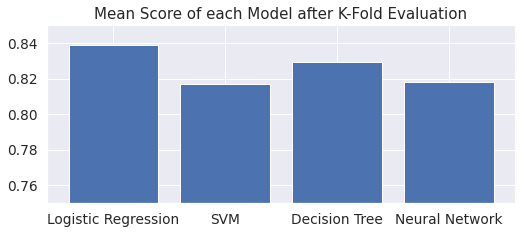

In [206]:
plt.ylim(0.75, 0.85)
plt.bar(model, mean_score)
plt.title("Mean Score of each Model after K-Fold Evaluation")

(0.0, 5.0)

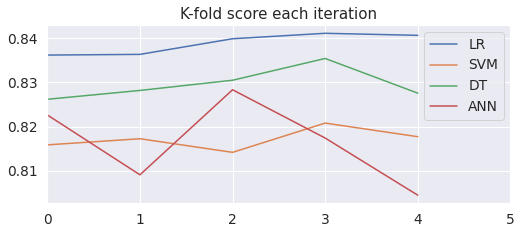

In [233]:
plt.plot(LogisticRegression_score, label = "LR")
plt.plot(SVM_score, label = "SVM")
plt.plot(decisionTree_score, label = "DT")
plt.plot(network_score, label = 'ANN')
plt.legend()
plt.title("K-fold score each iteration")
plt.xlim(0, 5)